In [35]:
from d3rlpy.algos import IQLConfig, CQLConfig, BCConfig, TD3PlusBCConfig, AWACConfig
from d3rlpy.dataset import create_fifo_replay_buffer
import minari
import copy
import time
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the experiments

In [2]:
# Loading Minari datasets for the tasks
pen_dataset = minari.load_dataset("D4RL/pen/expert-v2")
relocate_dataset = minari.load_dataset("D4RL/relocate/expert-v2")
hammer_dataset = minari.load_dataset("D4RL/hammer/expert-v2")
door_dataset = minari.load_dataset("D4RL/door/expert-v2")

pen_env = pen_dataset.recover_environment()
relocate_env = relocate_dataset.recover_environment()
hammer_env = hammer_dataset.recover_environment()
door_env = door_dataset.recover_environment()

# Number of episodes during the testing phase
N = 50

# Delay between one step of the episode and the next in simulation
delay = 0.01

n_steps = 1_000
n_steps_per_epoch = 100

# Training Algorithm

In [10]:
def train_algorithm(config_class, env, filename):
    # Initialize the algorithm on CPU
    algo = config_class().create(device="cpu")

    buffer = create_fifo_replay_buffer(limit=100000, env=env)

    # Build the neural networks based on the dataset
    algo.build_with_env(env)

    # Train the algorithm on the offline dataset and periodically evaluate online, saving the training history
    algo.fit_online(
        env,
        buffer,
        n_steps=n_steps,
        eval_env=copy.deepcopy(env),
        n_steps_per_epoch=n_steps_per_epoch,
        update_start_step=10,
    )

    #algo.save(f'{filename}.d3')

    # Return the trained policy and the training history
    return algo

# Policy Training

### Pen

In [11]:
# Recover the environment for the task
pen_env = pen_dataset.recover_environment()

# Train all policies, also saving the training history
pen_iql, pen_iql_hist = train_algorithm(IQLConfig, pen_env, 'policies/pen_online_iql')
pen_cql, pen_cql_hist = train_algorithm(CQLConfig, pen_env, 'policies/pen_online_cql')
pen_td3bc, pen_td3bc_hist = train_algorithm(TD3PlusBCConfig, pen_env, 'policies/pen_online_td3bc')
pen_awac, pen_awac_hist = train_algorithm(AWACConfig, pen_env, 'policies/pen_online_awac')

# Mapping of the training histories for the task
pen_histories = {
    'IQL': pen_iql_hist,
    'CQL': pen_cql_hist,
    'TD3+BC': pen_td3bc_hist,
    'AWAC': pen_awac_hist
}

2025-05-18 10:59.07 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(24,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(45,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-05-18 10:59.07 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-05-18 10:59.07 [info     ] Action size has been automatically determined. action_size=24
2025-05-18 10:59.08 [warning  ] Skip building models since they're already built.
2025-05-18 10:59.08 [info     ] Directory is created at d3rlpy_logs/IQL_online_20250518105908
2025-05-18 10:59.08 [info     ] Parameters                     params={'observation_shape': [45], 'action_size': 24, 'config': {'type': 'iql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none'

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 10:59.08 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518105908/model_100.d3
2025-05-18 10:59.08 [info     ] IQL_online_20250518105908: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00013554096221923828, 'time_environment_step': 0.00021624326705932617, 'time_step': 0.000365452766418457, 'rollout_return': 45.513205850642294, 'evaluation': 2.725298324830012} step=100
2025-05-18 10:59.09 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518105908/model_200.d3
2025-05-18 10:59.09 [info     ] IQL_online_20250518105908: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.779048919677735e-05, 'time_environment_step': 0.0001677536964416504, 'time_step': 0.00026387929916381835, 'rollout_return': -200.36000800104685, 'evaluation': 133.22625452564074} step=200
2025-05-18 10:59.09 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518105908/model_300.d3
2025-05-18 10:59.09 [info     ] IQL_online_20250518105908: ep

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 10:59.17 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518105917/model_100.d3
2025-05-18 10:59.17 [info     ] CQL_online_20250518105917: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00010619878768920899, 'time_environment_step': 0.00018611669540405273, 'time_step': 0.00030069589614868165, 'rollout_return': -237.8721175211284, 'evaluation': 28.45024667227829} step=100
2025-05-18 10:59.17 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518105917/model_200.d3
2025-05-18 10:59.17 [info     ] CQL_online_20250518105917: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.362770080566406e-05, 'time_environment_step': 0.0001720309257507324, 'time_step': 0.00026352882385253905, 'rollout_return': -288.2815268820558, 'evaluation': 29.66044407870684} step=200
2025-05-18 10:59.19 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518105917/model_300.d3
2025-05-18 10:59.19 [info     ] CQL_online_20250518105917: ep

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 10:59.42 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518105941/model_100.d3
2025-05-18 10:59.42 [info     ] BC_online_20250518105941: epoch=1 step=100 epoch=1 metrics={'time_inference': 4.89044189453125e-05, 'time_environment_step': 0.000229339599609375, 'time_step': 0.0002855086326599121, 'rollout_return': 27.231560266841804, 'evaluation': 9.482248756262864} step=100
2025-05-18 10:59.42 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518105941/model_200.d3
2025-05-18 10:59.42 [info     ] BC_online_20250518105941: epoch=2 step=200 epoch=2 metrics={'time_inference': 7.291793823242187e-05, 'time_environment_step': 0.00026099443435668947, 'time_step': 0.0015703463554382325, 'time_sample_batch': 0.000626890026793188, 'time_algorithm_update': 0.0006203748741928412, 'loss': 6.582430640985872e-05, 'rollout_return': 28.186949618165393, 'evaluation': 729.1452836227973} step=200
2025-05-18 10:59.43 [info     ] Model parameters are saved to

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 10:59.46 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518105946/model_100.d3
2025-05-18 10:59.46 [info     ] TD3PlusBC_online_20250518105946: epoch=1 step=100 epoch=1 metrics={'time_inference': 5.7687759399414064e-05, 'time_environment_step': 0.000231478214263916, 'time_step': 0.00029816865921020505, 'rollout_return': -3.341717499389534, 'evaluation': 206.72248565300697} step=100
2025-05-18 10:59.46 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518105946/model_200.d3
2025-05-18 10:59.46 [info     ] TD3PlusBC_online_20250518105946: epoch=2 step=200 epoch=2 metrics={'time_inference': 4.241466522216797e-05, 'time_environment_step': 0.00020851373672485353, 'time_step': 0.0002586650848388672, 'rollout_return': -48.136667596243576, 'evaluation': 130.59425462982753} step=200
2025-05-18 10:59.47 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518105946/model_300.d3
2025-05-18 10:59.47 [info     

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 10:59.53 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518105953/model_100.d3
2025-05-18 10:59.53 [info     ] AWAC_online_20250518105953: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00010756254196166992, 'time_environment_step': 0.00022665977478027343, 'time_step': 0.00034222841262817385, 'rollout_return': 38.698368706056584, 'evaluation': 30.539900456440666} step=100
2025-05-18 10:59.54 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518105953/model_200.d3
2025-05-18 10:59.54 [info     ] AWAC_online_20250518105953: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.46099853515625e-05, 'time_environment_step': 0.00020932197570800782, 'time_step': 0.00030144691467285154, 'rollout_return': 1577.3668327273763, 'evaluation': 12.11835860222828} step=200
2025-05-18 10:59.54 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518105953/model_300.d3
2025-05-18 10:59.54 [info     ] AWAC_online_20250518105

### Relocate

In [12]:
# Recover the environment for the task
relocate_env = relocate_dataset.recover_environment()

# Train all policies, also saving the training history
relocate_iql, relocate_iql_hist = train_algorithm(IQLConfig, relocate_env, 'policies/relocate_online_iql')
relocate_cql, relocate_cql_hist = train_algorithm(CQLConfig, relocate_env, 'policies/relocate_online_cql')
relocate_td3bc, relocate_td3bc_hist = train_algorithm(TD3PlusBCConfig, relocate_env, 'policies/relocate_online_td3bc')
relocate_awac, relocate_awac_hist = train_algorithm(AWACConfig, relocate_env, 'policies/relocate_online_awac')

# Mapping of the training histories for the task
relocate_histories = {
    'IQL': relocate_iql_hist,
    'CQL': relocate_cql_hist
    'TD3+BC': relocate_td3bc_hist,
    'AWAC': relocate_awac_hist
}

2025-05-18 10:59.56 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(30,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(39,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-05-18 10:59.56 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-05-18 10:59.56 [info     ] Action size has been automatically determined. action_size=30
2025-05-18 10:59.56 [warning  ] Skip building models since they're already built.
2025-05-18 10:59.56 [info     ] Directory is created at d3rlpy_logs/IQL_online_20250518105956
2025-05-18 10:59.56 [info     ] Parameters                     params={'observation_shape': [39], 'action_size': 30, 'config': {'type': 'iql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none'

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 10:59.57 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518105956/model_100.d3
2025-05-18 10:59.57 [info     ] IQL_online_20250518105956: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00011406421661376954, 'time_environment_step': 0.00022933483123779296, 'time_step': 0.00035048723220825194, 'evaluation': 5.992622306791523} step=100
2025-05-18 10:59.57 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518105956/model_200.d3
2025-05-18 10:59.57 [info     ] IQL_online_20250518105956: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.625507354736327e-05, 'time_environment_step': 0.00020354270935058594, 'time_step': 0.000297243595123291, 'rollout_return': 7.9334245495094455, 'evaluation': 5.611411262250153} step=200
2025-05-18 10:59.58 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518105956/model_300.d3
2025-05-18 10:59.58 [info     ] IQL_online_20250518105956: epoch=3 step=300 epoch=3 metrics={'time_i

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:00.07 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518110007/model_100.d3
2025-05-18 11:00.07 [info     ] CQL_online_20250518110007: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00011456966400146485, 'time_environment_step': 0.00022519350051879882, 'time_step': 0.00034657001495361326, 'evaluation': 4.318912289568408} step=100
2025-05-18 11:00.08 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518110007/model_200.d3
2025-05-18 11:00.08 [info     ] CQL_online_20250518110007: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.230447769165039e-05, 'time_environment_step': 0.00020660400390625, 'time_step': 0.000296781063079834, 'rollout_return': 6.722645998009048, 'evaluation': 3.612386922708283} step=200
2025-05-18 11:00.10 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518110007/model_300.d3
2025-05-18 11:00.10 [info     ] CQL_online_20250518110007: epoch=3 step=300 epoch=3 metrics={'time_infer

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:00.34 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518110033/model_100.d3
2025-05-18 11:00.34 [info     ] BC_online_20250518110033: epoch=1 step=100 epoch=1 metrics={'time_inference': 4.619121551513672e-05, 'time_environment_step': 0.0002035236358642578, 'time_step': 0.00025586128234863283, 'evaluation': 4.205240879061149} step=100
2025-05-18 11:00.34 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518110033/model_200.d3
2025-05-18 11:00.34 [info     ] BC_online_20250518110033: epoch=2 step=200 epoch=2 metrics={'time_inference': 7.24172592163086e-05, 'time_environment_step': 0.00025098323822021485, 'time_step': 0.0015842556953430177, 'time_sample_batch': 0.0006236163052645596, 'time_algorithm_update': 0.0006355637251728713, 'loss': 5.8305981965404496e-05, 'rollout_return': 2.7629050667409314, 'evaluation': 4.586421373243935} step=200
2025-05-18 11:00.35 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518110

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:00.40 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518110040/model_100.d3
2025-05-18 11:00.40 [info     ] TD3PlusBC_online_20250518110040: epoch=1 step=100 epoch=1 metrics={'time_inference': 5.688905715942383e-05, 'time_environment_step': 0.00022560596466064453, 'time_step': 0.0002893257141113281, 'evaluation': 3.815584479303221} step=100
2025-05-18 11:00.41 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518110040/model_200.d3
2025-05-18 11:00.41 [info     ] TD3PlusBC_online_20250518110040: epoch=2 step=200 epoch=2 metrics={'time_inference': 4.411697387695312e-05, 'time_environment_step': 0.0001973700523376465, 'time_step': 0.00024880170822143554, 'rollout_return': 6.13710400531731, 'evaluation': 3.976654709052518} step=200
2025-05-18 11:00.42 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518110040/model_300.d3
2025-05-18 11:00.42 [info     ] TD3PlusBC_online_20250518110040: epoch=3 

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:00.50 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518110049/model_100.d3
2025-05-18 11:00.50 [info     ] AWAC_online_20250518110049: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00011042356491088867, 'time_environment_step': 0.00023739099502563478, 'time_step': 0.0003545022010803223, 'evaluation': 4.963278486616798} step=100
2025-05-18 11:00.50 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518110049/model_200.d3
2025-05-18 11:00.50 [info     ] AWAC_online_20250518110049: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.402347564697266e-05, 'time_environment_step': 0.00020545482635498047, 'time_step': 0.0002969813346862793, 'rollout_return': 12.916365017162622, 'evaluation': 3.526010083838397} step=200
2025-05-18 11:00.51 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518110049/model_300.d3
2025-05-18 11:00.51 [info     ] AWAC_online_20250518110049: epoch=3 step=300 epoch=3 metrics={'

### Hammer

In [13]:
# Recover the environment for the task
hammer_env = hammer_dataset.recover_environment()

# Train all policies, also saving the training history
hammer_iql, hammer_iql_hist = train_algorithm(IQLConfig, hammer_env, 'policies/hammer_online_iql')
hammer_cql, hammer_cql_hist = train_algorithm(CQLConfig, hammer_env, 'policies/hammer_online_cql')
hammer_td3bc, hammer_td3bc_hist = train_algorithm(TD3PlusBCConfig, hammer_env, 'policies/hammer_online_td3bc')
hammer_awac, hammer_awac_hist = train_algorithm(AWACConfig, hammer_env, 'policies/hammer_online_awac')

# Mapping of the training histories for the task
hammer_histories = {
    'IQL': hammer_iql_hist,
    'CQL': hammer_cql_hist
    'TD3+BC': hammer_td3bc_hist,
    'AWAC': hammer_awac_hist
}

2025-05-18 11:00.55 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(26,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(46,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-05-18 11:00.55 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-05-18 11:00.55 [info     ] Action size has been automatically determined. action_size=26
2025-05-18 11:00.55 [warning  ] Skip building models since they're already built.
2025-05-18 11:00.55 [info     ] Directory is created at d3rlpy_logs/IQL_online_20250518110055
2025-05-18 11:00.55 [info     ] Parameters                     params={'observation_shape': [46], 'action_size': 26, 'config': {'type': 'iql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none'

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:00.55 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518110055/model_100.d3
2025-05-18 11:00.55 [info     ] IQL_online_20250518110055: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00011176347732543945, 'time_environment_step': 0.00026575088500976565, 'time_step': 0.000384361743927002, 'evaluation': -232.4832356399339} step=100
2025-05-18 11:00.56 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518110055/model_200.d3
2025-05-18 11:00.56 [info     ] IQL_online_20250518110055: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.788347244262696e-05, 'time_environment_step': 0.0002457833290100098, 'time_step': 0.0003411531448364258, 'rollout_return': -240.0827972674721, 'evaluation': -230.00447244872012} step=200
2025-05-18 11:00.57 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518110055/model_300.d3
2025-05-18 11:00.57 [info     ] IQL_online_20250518110055: epoch=3 step=300 epoch=3 metrics={'time_

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:01.07 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518110106/model_100.d3
2025-05-18 11:01.07 [info     ] CQL_online_20250518110106: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00011063814163208008, 'time_environment_step': 0.0002672767639160156, 'time_step': 0.00038488388061523436, 'evaluation': -229.38693770400687} step=100
2025-05-18 11:01.07 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518110106/model_200.d3
2025-05-18 11:01.08 [info     ] CQL_online_20250518110106: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.539915084838867e-05, 'time_environment_step': 0.0002510833740234375, 'time_step': 0.0003440594673156738, 'rollout_return': -264.96921260963353, 'evaluation': -233.8750935919777} step=200
2025-05-18 11:01.09 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518110106/model_300.d3
2025-05-18 11:01.09 [info     ] CQL_online_20250518110106: epoch=3 step=300 epoch=3 metrics={'tim

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:01.35 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518110134/model_100.d3
2025-05-18 11:01.35 [info     ] BC_online_20250518110134: epoch=1 step=100 epoch=1 metrics={'time_inference': 4.777431488037109e-05, 'time_environment_step': 0.0002611684799194336, 'time_step': 0.00031476259231567384, 'evaluation': -233.5338091320419} step=100
2025-05-18 11:01.35 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518110134/model_200.d3
2025-05-18 11:01.35 [info     ] BC_online_20250518110134: epoch=2 step=200 epoch=2 metrics={'time_inference': 7.312297821044922e-05, 'time_environment_step': 0.0003004932403564453, 'time_step': 0.0016027116775512696, 'time_sample_batch': 0.000622262858381175, 'time_algorithm_update': 0.0006047234390721177, 'loss': 7.095597620361693e-05, 'rollout_return': -241.6873511042291, 'evaluation': -234.43851924265832} step=200
2025-05-18 11:01.36 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_2025051811

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:01.42 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518110141/model_100.d3
2025-05-18 11:01.42 [info     ] TD3PlusBC_online_20250518110141: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00012822389602661132, 'time_environment_step': 0.0005048274993896485, 'time_step': 0.0006519579887390137, 'evaluation': -230.57341295517216} step=100
2025-05-18 11:01.43 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518110141/model_200.d3
2025-05-18 11:01.43 [info     ] TD3PlusBC_online_20250518110141: epoch=2 step=200 epoch=2 metrics={'time_inference': 4.640579223632812e-05, 'time_environment_step': 0.0002567911148071289, 'time_step': 0.00031406641006469726, 'rollout_return': -228.37219603408883, 'evaluation': -231.59419844930557} step=200
2025-05-18 11:01.44 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518110141/model_300.d3
2025-05-18 11:01.44 [info     ] TD3PlusBC_online_20250518110141: e

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:01.53 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518110152/model_100.d3
2025-05-18 11:01.53 [info     ] AWAC_online_20250518110152: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00011408090591430664, 'time_environment_step': 0.00026940345764160157, 'time_step': 0.00039065122604370117, 'evaluation': -233.92053842472757} step=100
2025-05-18 11:01.54 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518110152/model_200.d3
2025-05-18 11:01.54 [info     ] AWAC_online_20250518110152: epoch=2 step=200 epoch=2 metrics={'time_inference': 9.439229965209962e-05, 'time_environment_step': 0.00026218414306640627, 'time_step': 0.0003652691841125488, 'rollout_return': -234.99035713095043, 'evaluation': -232.3455197332807} step=200
2025-05-18 11:01.54 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518110152/model_300.d3
2025-05-18 11:01.54 [info     ] AWAC_online_20250518110152: epoch=3 step=300 epoch=3 metri

### Door

In [14]:
# Recover the environment for the task
door_env = door_dataset.recover_environment()

# Train all policies, also saving the training history
door_iql, door_iql_hist = train_algorithm(IQLConfig, door_env, 'policies/door_online_iql')
door_cql, door_cql_hist = train_algorithm(CQLConfig, door_env, 'policies/door_online_cql')
door_td3bc, door_td3bc_hist = train_algorithm(TD3PlusBCConfig, door_env, 'policies/door_online_td3bc')
door_awac, door_awac_hist = train_algorithm(AWACConfig, door_env, 'policies/door_online_awac')

# Mapping of the training histories for the task
door_histories = {
    'IQL': door_iql_hist,
    'CQL': door_cql_hist
    'TD3+BC': door_td3bc_hist,
    'AWAC': door_awac_hist
}

2025-05-18 11:01.59 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(28,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(39,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-05-18 11:01.59 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-05-18 11:01.59 [info     ] Action size has been automatically determined. action_size=28
2025-05-18 11:01.59 [warning  ] Skip building models since they're already built.
2025-05-18 11:01.59 [info     ] Directory is created at d3rlpy_logs/IQL_online_20250518110159
2025-05-18 11:01.59 [info     ] Parameters                     params={'observation_shape': [39], 'action_size': 28, 'config': {'type': 'iql', 'params': {'batch_size': 256, 'gamma': 0.99, 'observation_scaler': {'type': 'none', 'params': {}}, 'action_scaler': {'type': 'none', 'params': {}}, 'reward_scaler': {'type': 'none'

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:01.59 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518110159/model_100.d3
2025-05-18 11:01.59 [info     ] IQL_online_20250518110159: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00011974811553955078, 'time_environment_step': 0.0002209782600402832, 'time_step': 0.00034798860549926756, 'evaluation': -45.36996649458239} step=100
2025-05-18 11:02.00 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518110159/model_200.d3
2025-05-18 11:02.00 [info     ] IQL_online_20250518110159: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.888006210327149e-05, 'time_environment_step': 0.00019825696945190429, 'time_step': 0.0002951931953430176, 'rollout_return': -45.34228733132587, 'evaluation': -45.37374453891202} step=200
2025-05-18 11:02.01 [info     ] Model parameters are saved to d3rlpy_logs/IQL_online_20250518110159/model_300.d3
2025-05-18 11:02.01 [info     ] IQL_online_20250518110159: epoch=3 step=300 epoch=3 metrics={'time

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:02.10 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518110209/model_100.d3
2025-05-18 11:02.10 [info     ] CQL_online_20250518110209: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.0001101088523864746, 'time_environment_step': 0.00023115158081054687, 'time_step': 0.00034809350967407226, 'evaluation': -45.34573941806534} step=100
2025-05-18 11:02.11 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518110209/model_200.d3
2025-05-18 11:02.11 [info     ] CQL_online_20250518110209: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.480072021484375e-05, 'time_environment_step': 0.00021330118179321289, 'time_step': 0.00030561208724975584, 'rollout_return': -47.24461691153716, 'evaluation': -45.29622320138722} step=200
2025-05-18 11:02.12 [info     ] Model parameters are saved to d3rlpy_logs/CQL_online_20250518110209/model_300.d3
2025-05-18 11:02.12 [info     ] CQL_online_20250518110209: epoch=3 step=300 epoch=3 metrics={'tim

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:02.38 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518110237/model_100.d3
2025-05-18 11:02.38 [info     ] BC_online_20250518110237: epoch=1 step=100 epoch=1 metrics={'time_inference': 5.015134811401367e-05, 'time_environment_step': 0.0002062058448791504, 'time_step': 0.00026236534118652345, 'evaluation': -45.49389556647826} step=100
2025-05-18 11:02.38 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518110237/model_200.d3
2025-05-18 11:02.38 [info     ] BC_online_20250518110237: epoch=2 step=200 epoch=2 metrics={'time_inference': 7.535457611083984e-05, 'time_environment_step': 0.00024364233016967773, 'time_step': 0.001575760841369629, 'time_sample_batch': 0.0006281221755827316, 'time_algorithm_update': 0.0006268915503916114, 'loss': 5.4061734212047404e-05, 'rollout_return': -45.84299710029288, 'evaluation': -45.314671329971446} step=200
2025-05-18 11:02.39 [info     ] Model parameters are saved to d3rlpy_logs/BC_online_20250518

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:02.44 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518110243/model_100.d3
2025-05-18 11:02.44 [info     ] TD3PlusBC_online_20250518110243: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00014258623123168944, 'time_environment_step': 0.00040036916732788086, 'time_step': 0.0005601692199707031, 'evaluation': -44.6543266774868} step=100
2025-05-18 11:02.44 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518110243/model_200.d3
2025-05-18 11:02.44 [info     ] TD3PlusBC_online_20250518110243: epoch=2 step=200 epoch=2 metrics={'time_inference': 4.6215057373046876e-05, 'time_environment_step': 0.00018294334411621095, 'time_step': 0.00023652791976928712, 'rollout_return': -44.046136132593205, 'evaluation': -44.839318902136526} step=200
2025-05-18 11:02.45 [info     ] Model parameters are saved to d3rlpy_logs/TD3PlusBC_online_20250518110243/model_300.d3
2025-05-18 11:02.45 [info     ] TD3PlusBC_online_20250518110243: 

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-05-18 11:02.53 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518110252/model_100.d3
2025-05-18 11:02.53 [info     ] AWAC_online_20250518110252: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.00011611223220825195, 'time_environment_step': 0.00020025253295898437, 'time_step': 0.0003231477737426758, 'evaluation': -43.07526206961582} step=100
2025-05-18 11:02.53 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518110252/model_200.d3
2025-05-18 11:02.53 [info     ] AWAC_online_20250518110252: epoch=2 step=200 epoch=2 metrics={'time_inference': 8.480072021484375e-05, 'time_environment_step': 0.00018846988677978516, 'time_step': 0.00028100490570068357, 'rollout_return': -42.99840336056041, 'evaluation': -43.0824633417091} step=200
2025-05-18 11:02.54 [info     ] Model parameters are saved to d3rlpy_logs/AWAC_online_20250518110252/model_300.d3
2025-05-18 11:02.54 [info     ] AWAC_online_20250518110252: epoch=3 step=300 epoch=3 metrics=

# Visualization of policies

In [18]:
def visualize(env, policy):
    
    obs, _ = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = policy.predict(obs[None])[0]
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        time.sleep(delay)
    
    env.close()

In [19]:
env = door_dataset.recover_environment(render_mode="human", camera_id=4)
visualize(env, door_bc)

# Rollout over N episodes

In [21]:
def evaluate_policies(policies, env, n_episodes=10):
    # Initialize a dictionary to collect rewards for each policy
    all_rewards = {name: [] for name in policies.keys()}

    # Generate a list of random seeds to make the episodes reproducible
    seeds = np.random.randint(0, 10000, size=n_episodes)

    # Loop over episodes
    for episode_idx in range(n_episodes):
        seed = seeds[episode_idx]
        
        # Evaluate each policy on the same episode (same seed)
        for name, policy in policies.items():
            obs, _ = env.reset(seed=int(seed))
            done = False
            total_reward = 0.0
            step_count = 0

            # Perform rollout until the end of the episode
            while not done:
                action = policy.predict(obs[None])[0]
                obs, reward, terminated, truncated, _ = env.step(action)
                total_reward += reward
                step_count += 1
                done = terminated or truncated

            # Compute and store the average reward per step
            avg_reward = total_reward / step_count if step_count > 0 else 0.0
            all_rewards[name].append(avg_reward)

    # Return the collected average rewards for each policy
    return all_rewards

### Pen

In [51]:
# Define the dictionaries of trained policies for the Pen tasks
policies_pen_online = {
    "IQL": pen_iql,
    "CQL": pen_cql,
    "BC": pen_bc,
    "TD3+BC": pen_td3bc,
    "AWAC": pen_awac
}

# Recover the MuJoCo environments for evaluation
pen_env = pen_dataset.recover_environment()

# Perform policy evaluation over N episodes for each task
pen_rewards = evaluate_policies(policies_pen_finetuned, pen_env, N)

# Close the environments
pen_env.close()

### Relocate

In [52]:
policies_relocate_online = {
    "IQL": relocate_iql,
    "CQL": relocate_cql,
    "BC": relocate_bc,
    "TD3+BC": relocate_td3bc,
    "AWAC": relocate_awac
}
relocate_env = relocate_dataset.recover_environment()
relocate_rewards = evaluate_policies(policies_relocate_finetuned, relocate_env, N)
relocate_env.close()

### Hammer

In [53]:
policies_hammer_online = {
    "IQL": hammer_iql,
    "CQL": hammer_cql,
    "BC": hammer_bc,
    "TD3+BC": hammer_td3bc,
    "AWAC": hammer_awac
}
hammer_env = hammer_dataset.recover_environment()
hammer_rewards = evaluate_policies(policies_hammer_finetuned, hammer_env, N)
hammer_env.close()

### Door

In [54]:
policies_door_online = {
    "IQL": door_iql,
    "CQL": door_cql,
    "BC": door_bc,
    "TD3+BC": door_td3bc,
    "AWAC": door_awac
}
door_env = door_dataset.recover_environment()
door_rewards = evaluate_policies(policies_door_finetuned, door_env, N)
door_env.close()

# Results

In [55]:
# Define a fixed order of algorithms for the plots
algorithms = ['IQL', 'CQL', 'BC', 'TD3+BC', 'AWAC']

# Assign a specific color to each algorithm
colors = {
    'IQL': 'tab:blue',
    'CQL': 'tab:orange',
    'BC': 'tab:green',
    'TD3+BC': 'tab:red',
    'AWAC': 'tab:purple'
}

## Average Reward

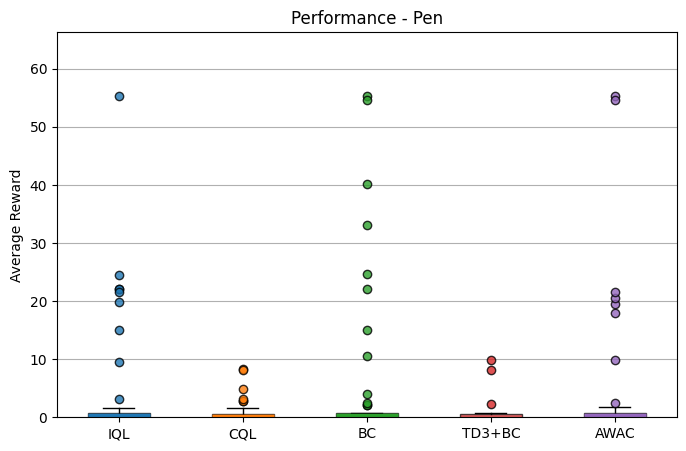

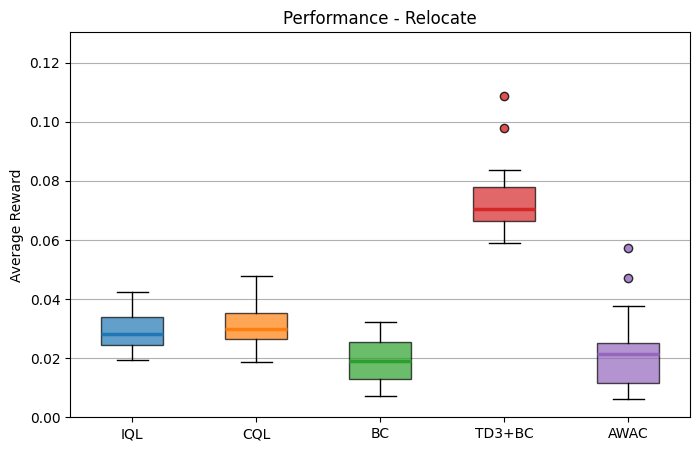

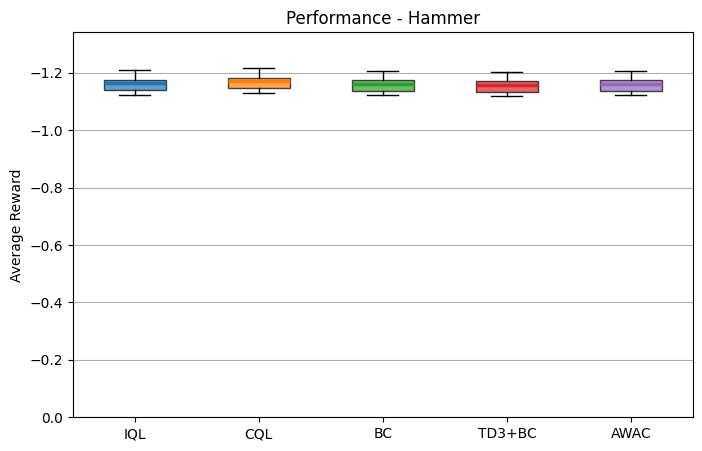

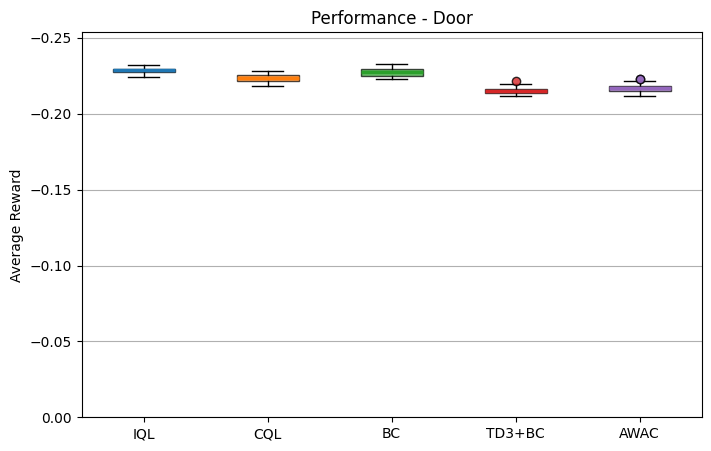

In [56]:
# Dati ordinati secondo gli algoritmi
data = [
    [pen_rewards[algo] for algo in algorithms],
    [relocate_rewards[algo] for algo in algorithms],
    [hammer_rewards[algo] for algo in algorithms],
    [door_rewards[algo] for algo in algorithms]
]

tasks = ['Pen', 'Relocate', 'Hammer', 'Door']

filenames = [
    'experiment_3_1_boxplot_pen.png',
    'experiment_3_1_boxplot_relocate.png',
    'experiment_3_1_boxplot_hammer.png',
    'experiment_3_1_boxplot_door.png'
]

for t in range(4):
    fig, ax = plt.subplots(figsize=(8, 5))
    box = ax.boxplot(data[t], patch_artist=True, tick_labels=algorithms)
    
    # Colora box, mediane e outlier
    for patch, median_line, flier, algo in zip(box['boxes'], box['medians'], box['fliers'], algorithms):
        color = colors[algo]
        
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

        median_line.set_color(color)
        median_line.set_linewidth(2.5)

        flier.set_markerfacecolor(color)
        flier.set_markeredgecolor('black')
        flier.set_alpha(0.8)
        flier.set_markersize(6)

    ax.set_title(f'Performance - {tasks[t]}')
    ax.set_ylabel('Average Reward')
    ax.grid(True, axis='y')
    ax.set_ylim(0, max(max(r) for r in data[t]) * 1.2)

    # Salva e mostra
    plt.savefig(f'../../results/{filenames[t]}', dpi=300, bbox_inches='tight')
    plt.show()

## Reward function

In [57]:
# Function to extract average rewards from a history
def extract_metric(history, key):
    return [entry[1][key] for entry in history]  # env contains the average reward

In [60]:
print(hammer_histories)

{'IQL': None, 'CQL': None, 'BC': None, 'TD3+BC': None, 'AWAC': None}


TypeError: 'NoneType' object is not iterable

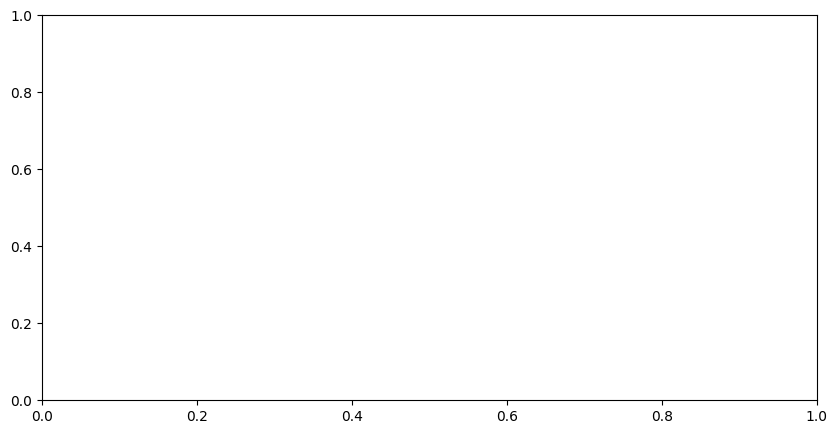

In [48]:
import matplotlib.pyplot as plt

# Liste dei dati e dei titoli
data = [pen_histories, relocate_histories, hammer_histories, door_histories]
tasks = ['Pen', 'Relocate', 'Hammer', 'Door']
filenames = [
    'experiment_1_2_reward_pen.png',
    'experiment_1_2_reward_relocate.png',
    'experiment_1_2_reward_hammer.png',
    'experiment_1_2_reward_door.png'
]

for t in range(4):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    for algo in algorithms:
        rewards = extract_metric(data[t][algo], 'environment')
        ax.plot(range(1, len(rewards) + 1), rewards, label=algo, color=colors[algo])
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Average Reward')
    ax.set_title(f'Evolution of the average reward during training - {tasks[t]}')
    ax.set_xticks(range(1, len(rewards) + 1))
    ax.legend()
    ax.grid(True, axis='y')

    plt.savefig(f'../results/{filenames[t]}', dpi=300, bbox_inches='tight')
    plt.show()